## Geometric manipulations
GeoPandas makes available all the tools for geometric manipulations in the [Shapely library](http://shapely.readthedocs.io/en/latest/manual.html).

Note that documentation for all set-theoretic tools for creating new shapes using the relationship between two different spatial datasets – like creating intersections, or differences – can be found at [Set operations with overlay](https://geopandas.org/en/stable/docs/user_guide/set_operations.html).

### Constructive methods
**GeoSeries.`buffer`(distance, resolution=16)**

Returns a [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) of geometries representing all points within a given distance of each geometric object.

**GeoSeries.`boundary`**

Returns a [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) of lower dimensional objects representing each geometry’s set-theoretic boundary.

**GeoSeries.`centroid`**

Returns a [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) of points for each geometric centroid.

**GeoSeries.`concave_hull`**

Returns a [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) of geometries representing the smallest concave Polygon containing all the points in each object unless the number of points in the object is less than three. For two points, the concave hull collapses to a LineString; for 1, a Point.

**GeoSeries.`convex_hull`**

Returns a [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) of geometries representing the smallest convex Polygon containing all the points in each object unless the number of points in the object is less than three. For two points, the convex hull collapses to a LineString; for 1, a Point.

**GeoSeries.`delaunay_triangles`(tolerance, preserve_topology=True)**

Returns a [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) consisting of polygons (default) or linestrings (only_edges=True) representing the computed Delaunay triangulation around the vertices of an input geometry.

**GeoSeries.`envelope`**

Returns a [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) of geometries representing the point or smallest rectangular polygon (with sides parallel to the coordinate axes) that contains each object.

**GeoSeries.`extract_unique_points`()**

Returns a [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) of geometries containing all distinct vertices of each input geometry as a multipoint.

**GeoSeries.`offset_curve`(distance, quad_segs=8, join_style='round', mitre_limit=5.0)**

Returns a [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) containing a Linestring or MultiLineString geometry at a distance from the object on its right or its left side.

**GeoSeries.`remove_repeated_points`()**

Returns a [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) containing a copy of the input geometry with repeated points removed.

**GeoSeries.`simplify`(tolerance, preserve_topology=True)**

Returns a [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) containing a simplified representation of each object.

**GeoSeries.`segmentize`(max_segment_length)**

Returns a [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) with additional vertices added to line segments based on max_segment_length.

**GeoSeries.`unary_union`**

Return a geometry containing the union of all geometries in the [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries).

### Affine transformations

**GeoSeries.`affine_transform`(self, matrix)**

Transform the geometries of the [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) using an affine transformation matrix

**GeoSeries.`rotate`(self, angle, origin='center', use_radians=False)**

Rotate the coordinates of the [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries).

**GeoSeries.`scale`(self, xfact=1.0, yfact=1.0, zfact=1.0, origin='center')**

Scale the geometries of the [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) along each (x, y, z) dimension.

**GeoSeries.`skew`(self, angle, origin='center', use_radians=False)**

Shear/Skew the geometries of the [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) by angles along x and y dimensions.

**GeoSeries.`translate`(self, xoff=0.0, yoff=0.0, zoff=0.0)**

Shift the coordinates of the [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries).

### Examples of geometric manipulations

In [1]:
import geopandas
from shapely.geometry import Polygon

In [2]:
p1 = Polygon([(0, 0), (1, 0), (1, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])

g = geopandas.GeoSeries([p1, p2, p3])
g

0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
dtype: geometry

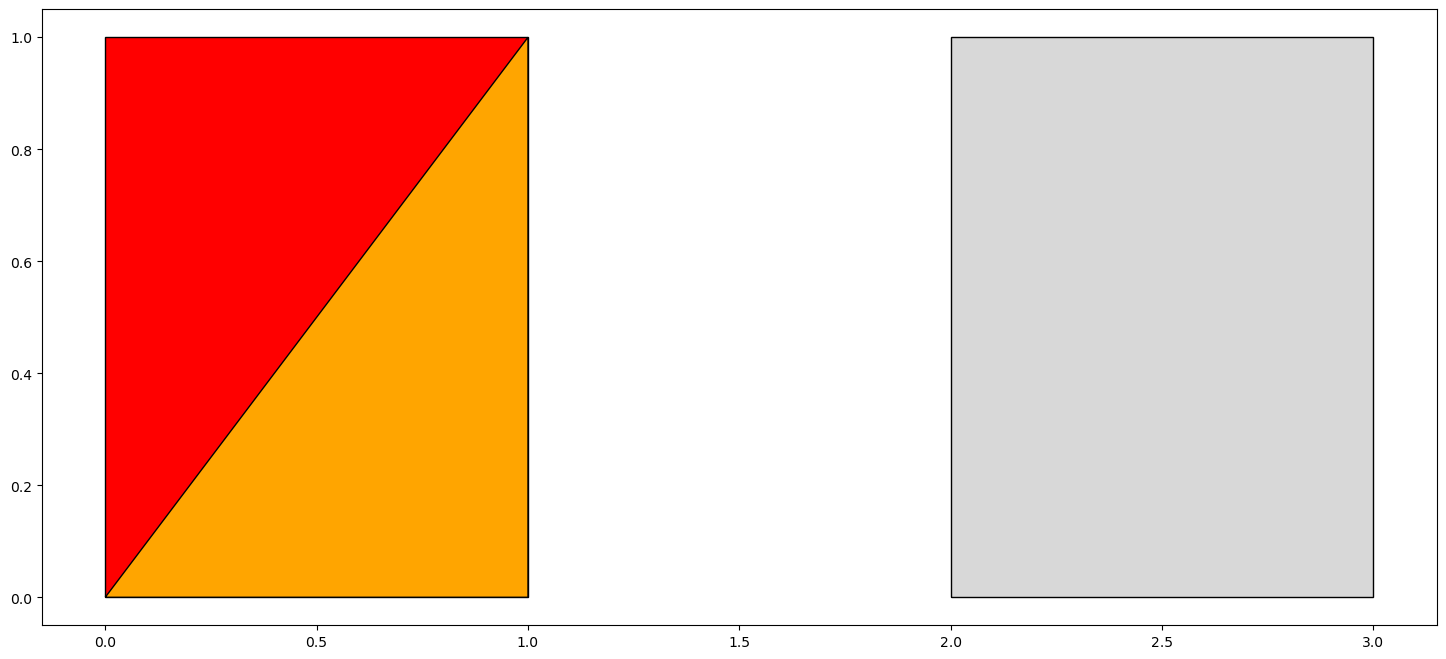

In [36]:
from shapely.plotting import plot_polygon
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18, 8))

plot_polygon(g[0], ax=ax, add_points=False, color='orange', edgecolor='black', alpha=1, zorder=2);
plot_polygon(g[1], ax=ax, add_points=False, color='red', edgecolor='black', alpha=1, zorder=1);
plot_polygon(g[2], ax=ax, add_points=False, color='gray', edgecolor='black');

Some geographic operations return normal pandas objects. The [`area`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.area.html#geopandas.GeoSeries.area) property of a [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) will return a [`pandas.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) containing the area of each item in the [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries):

In [6]:
print(g.area)

0    0.5
1    1.0
2    1.0
dtype: float64


In [7]:
g.buffer(0.5)

0    POLYGON ((-0.35355 0.35355, 0.64645 1.35355, 0...
1    POLYGON ((-0.50000 0.00000, -0.50000 1.00000, ...
2    POLYGON ((1.50000 0.00000, 1.50000 1.00000, 1....
dtype: geometry

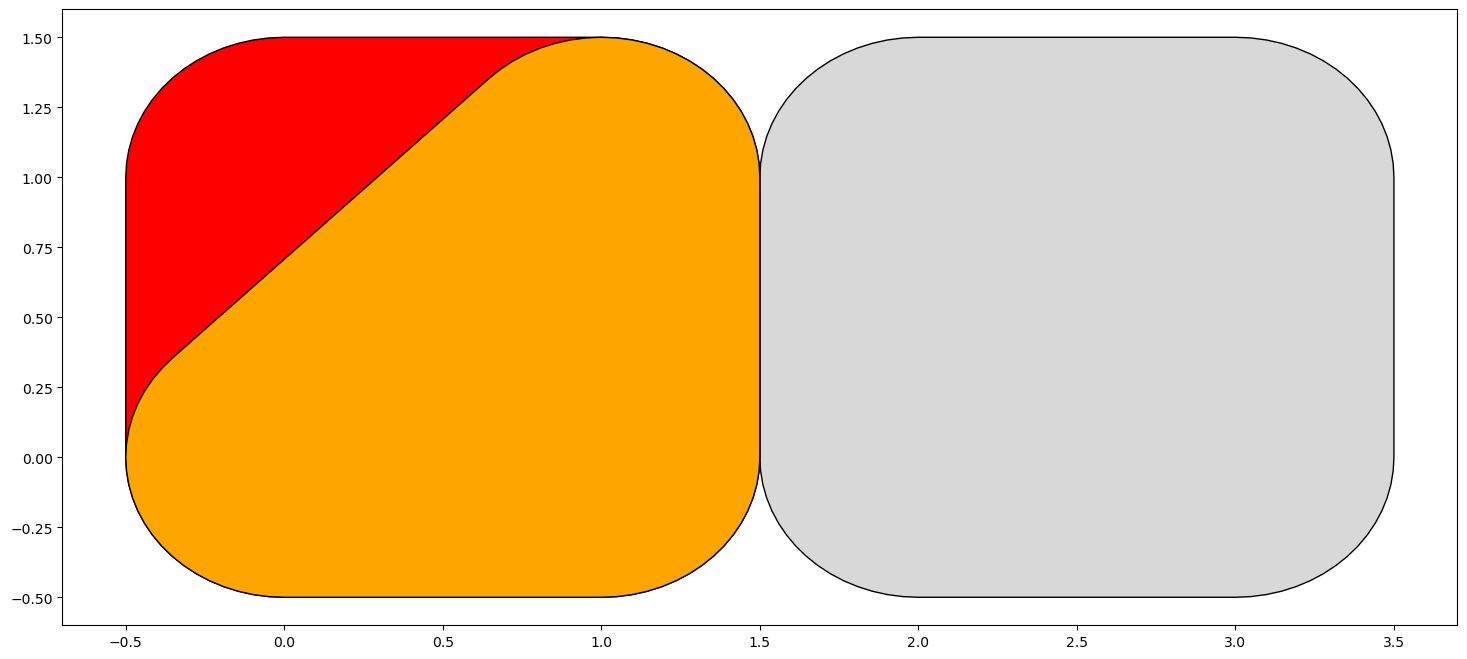

In [38]:
from shapely.plotting import plot_polygon
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18, 8))

plot_polygon(g[0].buffer(0.5), ax=ax, add_points=False,
             color='orange', edgecolor='black', alpha=1, zorder=2);
plot_polygon(g[1].buffer(0.5), ax=ax, add_points=False,
             color='red', edgecolor='black', alpha=1, zorder=1);
plot_polygon(g[2].buffer(0.5), ax=ax, add_points=False, color='gray', edgecolor='black');

GeoPandas objects also know how to plot themselves. GeoPandas uses [matplotlib](http://matplotlib.org/) for plotting. To generate a plot of a [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries), use:

<Axes: >

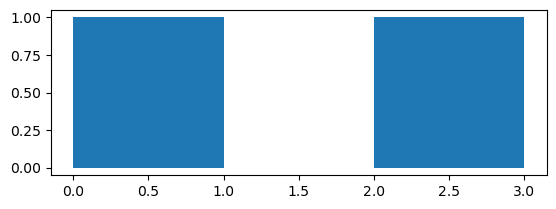

In [39]:
g.plot()

GeoPandas also implements alternate constructors that can read any data format recognized by p. To read a zip file containing an ESRI shapefile with the borough boundaries of New York City (GeoPandas includes this as an example dataset):
GeoPandas also implements alternate constructors that can read any data format recognized by [Fiona](). To read a zip file containing an ESRI shapefile with the [borough boundaries of New York City](https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm) (GeoPandas includes this as an example dataset):

In [40]:
import geodatasets

In [42]:
nybb_path = geodatasets.get_path('nybb')
boros = geopandas.read_file(nybb_path)
boros.set_index('BoroCode', inplace=True)
boros.sort_index(inplace=True)
boros.head()

BoroName     Shape_Leng    Shape_Area  \
BoroCode                                               
1             Manhattan  359299.096471  6.364715e+08   
2                 Bronx  464392.991824  1.186925e+09   
3              Brooklyn  741080.523166  1.937479e+09   
4                Queens  896344.047763  3.045213e+09   
5         Staten Island  330470.010332  1.623820e+09   

                                                   geometry  
BoroCode                                                     
1         MULTIPOLYGON (((981219.056 188655.316, 980940....  
2         MULTIPOLYGON (((1012821.806 229228.265, 101278...  
3         MULTIPOLYGON (((1021176.479 151374.797, 102100...  
4         MULTIPOLYGON (((1029606.077 156073.814, 102957...  
5         MULTIPOLYGON (((970217.022 145643.332, 970227....

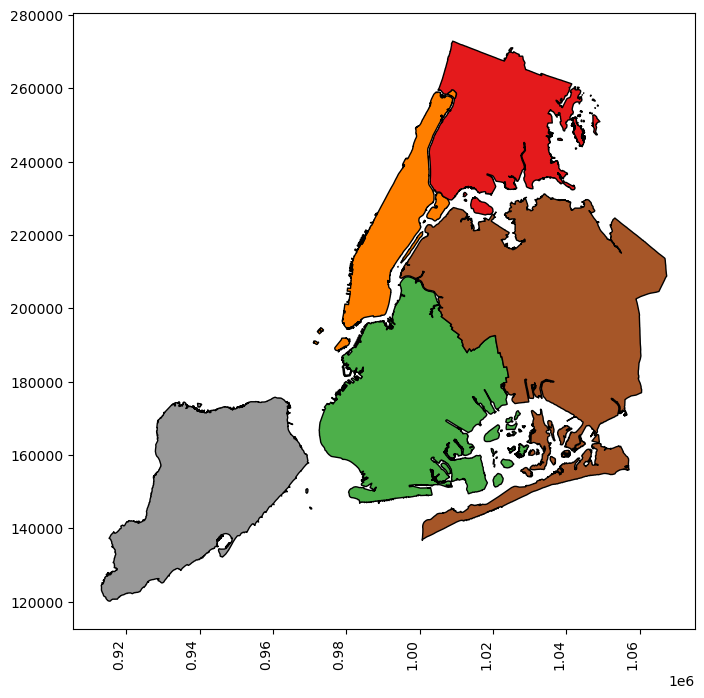

In [60]:
boros.plot(figsize=(12, 8), column="BoroName", cmap="Set1", edgecolor='black')
plt.xticks(rotation=90, ha='right');

In [51]:
boros.convex_hull

BoroCode
1    POLYGON ((977855.445 188082.322, 971830.134 19...
2    POLYGON ((1017949.978 225426.885, 1015563.562 ...
3    POLYGON ((988872.821 146772.032, 983670.606 14...
4    POLYGON ((1000721.532 136681.776, 994611.996 2...
5    POLYGON ((915517.688 120121.881, 915467.035 12...
dtype: geometry

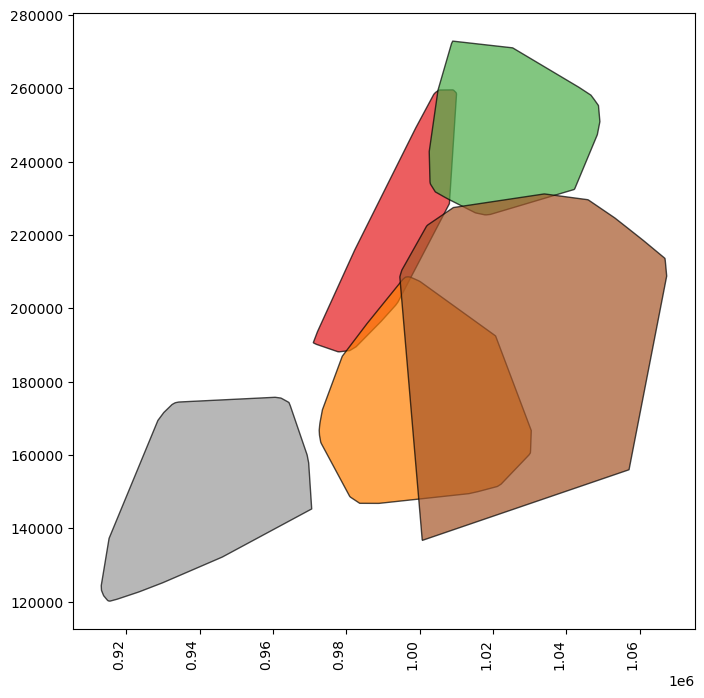

In [61]:
boros.convex_hull.plot(figsize=(12, 8), cmap="Set1", edgecolor='black', alpha=0.7)
plt.xticks(rotation=90, ha='right');

To demonstrate a more complex operation, generate a [`GeoSeries`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html#geopandas.GeoSeries) containing 2000 random points:

In [62]:
import numpy as np
from shapely import Point

In [63]:
x_min, x_max, y_min, y_max = 900000, 1080000, 120000, 280000
xc = (x_max - x_min) * np.random.random(2000) + x_min
yc = (y_max - y_min) * np.random.random(2000) + y_min
pts = geopandas.GeoSeries([Point(x, y) for x, y in zip(xc, yc)])
pts

0        POINT (958021.206 235656.070)
1       POINT (1073001.735 149670.933)
2       POINT (1065509.718 181605.955)
3        POINT (907441.486 167234.686)
4        POINT (990855.449 186166.889)
                     ...              
1995    POINT (1055161.499 268976.597)
1996    POINT (1007681.808 265647.508)
1997     POINT (919737.361 226743.731)
1998     POINT (960514.581 152534.517)
1999     POINT (951734.360 221177.053)
Length: 2000, dtype: geometry

Now draw a circle with fixed radius around each point:

In [64]:
circles = pts.buffer(2000)
circles

0       POLYGON ((960021.206 235656.070, 960011.575 23...
1       POLYGON ((1075001.735 149670.933, 1074992.104 ...
2       POLYGON ((1067509.718 181605.955, 1067500.087 ...
3       POLYGON ((909441.486 167234.686, 909431.856 16...
4       POLYGON ((992855.449 186166.889, 992845.819 18...
                              ...                        
1995    POLYGON ((1057161.499 268976.597, 1057151.868 ...
1996    POLYGON ((1009681.808 265647.508, 1009672.178 ...
1997    POLYGON ((921737.361 226743.731, 921727.730 22...
1998    POLYGON ((962514.581 152534.517, 962504.950 15...
1999    POLYGON ((953734.360 221177.053, 953724.729 22...
Length: 2000, dtype: geometry

<Axes: >

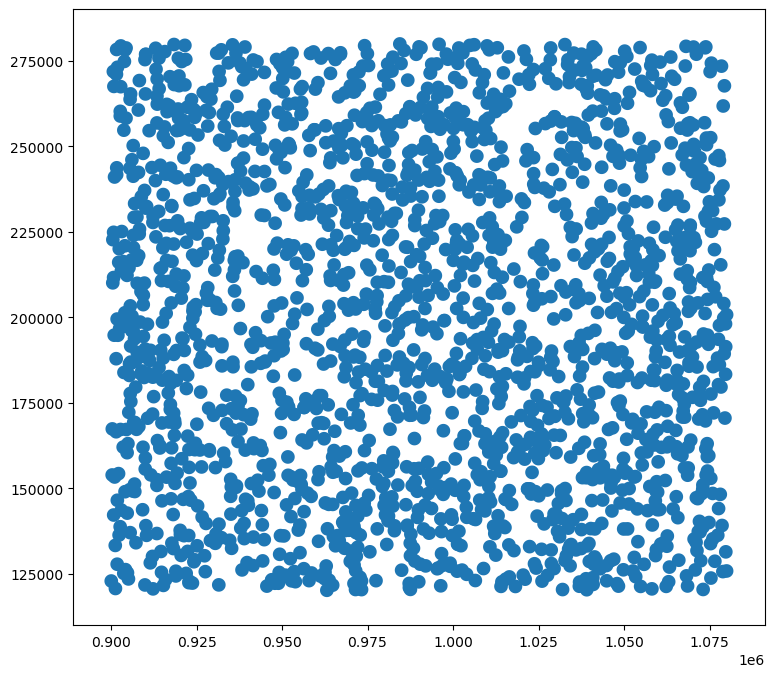

In [65]:
circles.plot(figsize=(12, 8))

You can collapse these circles into a single [`MultiPolygon`](https://shapely.readthedocs.io/en/stable/manual.html#MultiPolygon) geometry with

In [67]:
mp = circles.unary_union
mp

To extract the part of this geometry contained in each borough, you can just use:

In [70]:
holes = boros['geometry'].intersection(mp)
holes

BoroCode
1    MULTIPOLYGON (((980940.519 188435.398, 980873....
2    MULTIPOLYGON (((1012500.812 229168.281, 101233...
3    MULTIPOLYGON (((1021002.862 151329.108, 102087...
4    MULTIPOLYGON (((1036018.327 158014.353, 103601...
5    MULTIPOLYGON (((970227.216 145641.634, 970273....
dtype: geometry

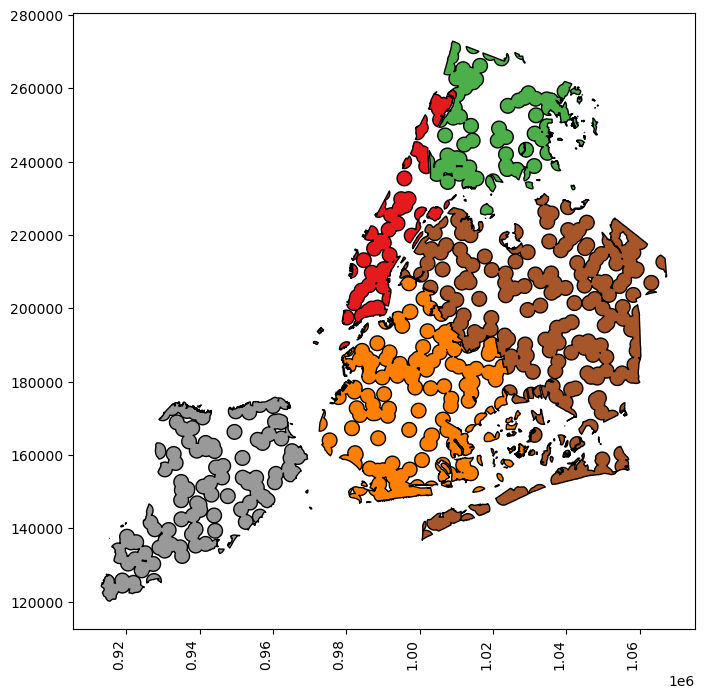

In [71]:
holes.plot(figsize=(12, 8), cmap="Set1", edgecolor='black')
plt.xticks(rotation=90, ha='right');

and to get the area outside of the holes:

In [72]:
boros_with_holes = boros['geometry'].difference(mp)
boros_with_holes

BoroCode
1    MULTIPOLYGON (((982789.589 189664.521, 982765....
2    MULTIPOLYGON (((1012785.913 229165.348, 101270...
3    MULTIPOLYGON (((1020447.262 151454.148, 102035...
4    MULTIPOLYGON (((1029578.007 156052.222, 102958...
5    MULTIPOLYGON (((969057.267 150478.472, 969013....
dtype: geometry

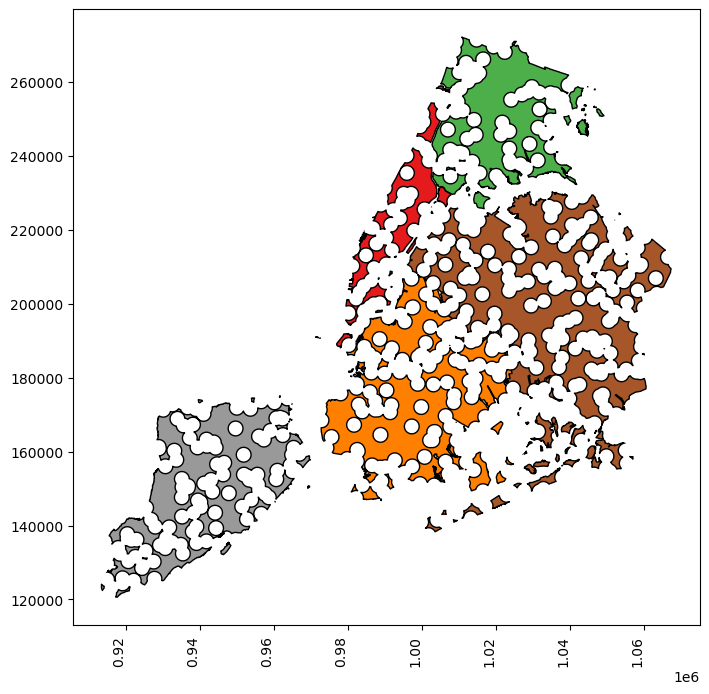

In [73]:
boros_with_holes.plot(figsize=(12, 8), cmap="Set1", edgecolor='black')
plt.xticks(rotation=90, ha='right');

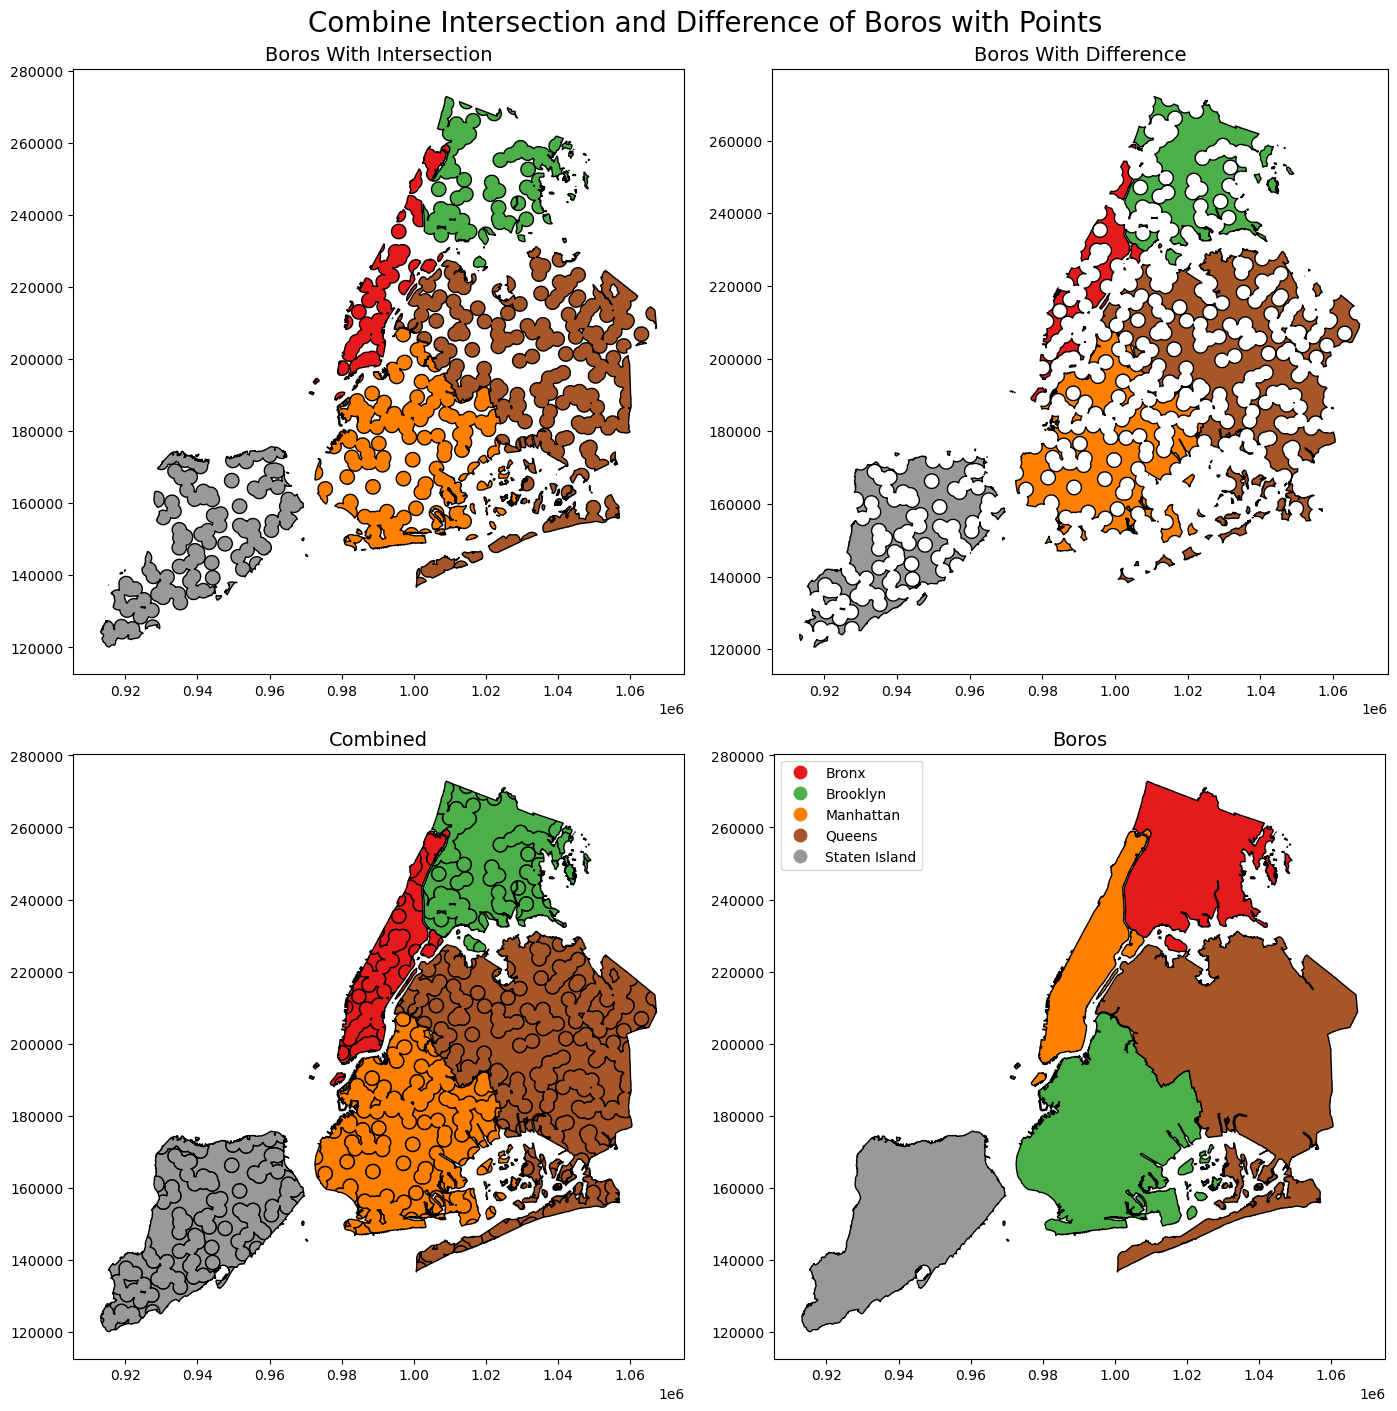

In [111]:
# Combine intersection and difference
import matplotlib.gridspec as gridspec

fig = plt.figure(layout="constrained", figsize=(14, 14))

gs = gridspec.GridSpec(2, 4, figure=fig)
ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[0, 2:])
ax3 = plt.subplot(gs[1, 0:2])
ax4 = plt.subplot(gs[1, 2:])

plt.suptitle("Combine Intersection and Difference of Boros with Points", fontsize=20, )

holes.plot(ax=ax1, cmap="Set1", edgecolor='black')
ax1.set_title("Boros With Intersection", fontsize=14)

boros_with_holes.plot(ax=ax2, cmap="Set1", edgecolor='black')
ax2.set_title("Boros With Difference", fontsize=14)

holes.plot(ax=ax3, cmap="Set1", edgecolor='black')
boros_with_holes.plot(ax=ax3, cmap="Set1", edgecolor='black')
ax3.set_title("Combined", fontsize=14)

boros.plot(ax=ax4, column="BoroName", cmap="Set1", edgecolor='black',
           legend=True, legend_kwds={'loc': 'upper left'})
ax4.set_title("Boros", fontsize=14)

plt.show()

In [112]:
fig.savefig("./out/Combine_Intersection_and Difference_of_Boros_with_Points", dpi=300)

Note that this can be simplified a bit, since *`geometry`* is available as an attribute on a [`GeoDataFrame`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas.GeoDataFrame), and the [`intersection()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.intersection.html#geopandas.GeoSeries.intersection) and [`difference()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.difference.html#geopandas.GeoSeries.difference) methods are implemented with the “&” and “-” operators, respectively. For example, the latter could have been expressed simply as *`boros.geometry - mp`*.

It’s easy to do things like calculate the fractional area in each borough that are in the holes:

In [113]:
holes.area / boros.geometry.area

BoroCode
1    0.626626
2    0.485006
3    0.566703
4    0.574445
5    0.575963
dtype: float64